# **Regresi Linear dan Evaluasi (Machine Learning)**

# A. Persiapan

## A.1. Import Library yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

## A.2. Import Dataset

Dataset ini diperoleh dari link berikut ini :
https://drive.google.com/file/d/1M4g2N6G6Xi9MuiIxQIG513Zb7HRM5ff4/view?usp=sharing

In [ ]:
df = pd.read_csv('sample_data/movie.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## A.3. Cek dan convert type data

In [ ]:
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce',format='%Y-%m-%d')

In [ ]:
df.dtypes

adult                            object
belongs_to_collection            object
budget                          float64
genres                           object
homepage                         object
id                               object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                       object
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
dtype: object

## A.4. Mendeteksi dan menghapus missing value

In [ ]:
df.isna().sum().sum()

105568

In [ ]:
dfc = df.dropna()

In [ ]:
dfc.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

# B. Regresi Linear

## B.1. Analisa Korelasi

In [ ]:
dfr = dfc[['budget','revenue','runtime','vote_average','vote_count']]
dfr

,budget,revenue,runtime,vote_average,vote_count
9,58000000.0,352194034.0,130.0,6.6,1194.0
68,3500000.0,28215918.0,91.0,7.0,513.0
69,19000000.0,25836616.0,108.0,6.9,1644.0
153,2000000.0,1275000.0,83.0,6.8,28.0
178,15000000.0,66000000.0,92.0,5.2,153.0
...,...,...,...,...,...
44274,152000000.0,369907963.0,140.0,6.7,1675.0
44674,0.0,0.0,101.0,6.0,35.0
44821,16000000.0,68411275.0,93.0,6.0,144.0
44842,260000000.0,604942143.0,149.0,6.2,1440.0


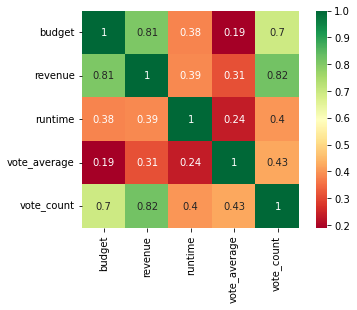

In [ ]:
sns.heatmap(dfr.corr(), square=True, cmap='RdYlGn', annot=True) 

Dari heatmap di atas dapat dilihat bahwa revenue memiliki nilai korelasi yang tinggi dengan vote_count dan juga dengan budget. Kita akan mencoba mengambil vote_count sebagai x dan revenue sebagai y (predictor).

## B.2. Training dan Pembuatan Model

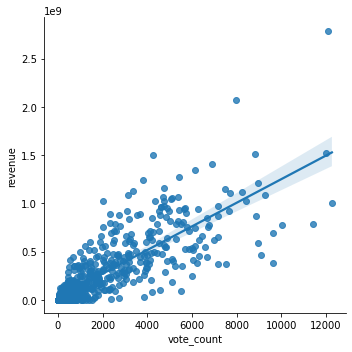

In [ ]:
sns.lmplot(x = 'vote_count', y = 'revenue', data = dfr)

Dapat dilihat bahwa ada beberapa outlier pada grafik, meskipun demikian terlihat korelasinya cukup kuat.

In [ ]:
# Persiapan data
x = dfr[['vote_count']]
y = dfr[['revenue']]

In [ ]:
# Splitting dataset ke dalam train dan test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
x_train

,vote_count
10491,553.0
12019,510.0
9211,208.0
36252,1656.0
18258,3971.0
...,...
17213,1925.0
15481,1746.0
23897,2677.0
6605,2556.0


In [ ]:
#Training Regresi Linear
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
# Fitting training data
regressor.fit(x_train, y_train)

LinearRegression()

## B.3. Model Evaluasi

In [ ]:
#check prediction score/accuracy
regressor.score(x_test, y_test)

0.6214225078149522

In [ ]:
# predict the y values
y_pred=regressor.predict(x_test)
# data frame dengan nilai actual and predicted dari y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
                         'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,33395426.0,1.440222e+08
1,0.0,1.841552e+07
2,956019788.0,6.658550e+08
3,201585328.0,5.684267e+08
4,0.0,1.748510e+07
5,363164265.0,3.391446e+08
6,783112979.0,1.537792e+09
7,68411275.0,3.582767e+07
8,333000000.0,3.943052e+08
9,29907685.0,3.715684e+07


In [ ]:
# Scoring the model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.6214225078149522
MSE score: 3.5160204598306812e+16


R2 semakin mendekati nilai 1 semakin tinggi akurasinya. R2 yang diperoleh adalah 0,62 yang dapat dikatakan cukup bagus.

## B.4. Plotting

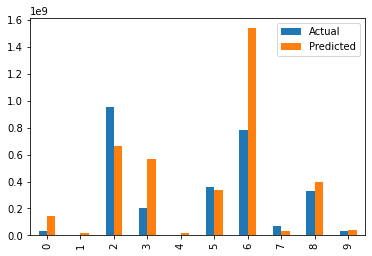

In [ ]:
evaluate.head(10).plot(kind = 'bar')

Dari diagram di atas, diperkirakan actual terlihat cukup berimbang dengan predicted.

# C. Regresi Linear lainnya

## C.1. Analisa Korelasi

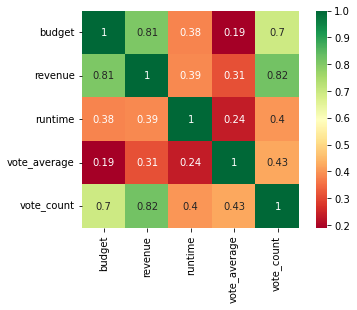

In [ ]:
sns.heatmap(dfr.corr(), square=True, cmap='RdYlGn', annot=True) 

Dari heatmap di atas dapat dilihat bahwa revenue juga memiliki nilai korelasi yang tinggi dengan budget hampir sama dengan vote_count. Kita akan mengambil budget sebagai x dan revenue sebagai y (predictor).

## C.2. Training dan Pembuatan Model

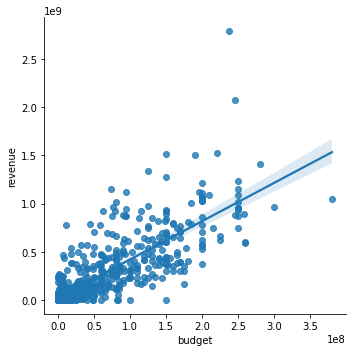

In [ ]:
sns.lmplot(x = 'budget', y = 'revenue', data = dfr)

Dapat dilihat bahwa ada beberapa outlier pada grafik, meskipun demikian terlihat korelasinya cukup kuat.

In [ ]:
# Persiapan data
x = dfr[['budget']]
y = dfr[['revenue']]

In [ ]:
# Split dataset ke dalam train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
x_train

,budget
10491,10000000.0
12019,15000000.0
9211,12000000.0
36252,60000000.0
18258,125000000.0
...,...
17213,150000000.0
15481,80000000.0
23897,125000000.0
6605,22000000.0


In [ ]:
#Training Regresi Linear
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
# Fitting training data
regressor.fit(x_train, y_train)

LinearRegression()

## C.3. Model Evaluasi

In [ ]:
#check prediction score/accuracy
regressor.score(x_test, y_test)

0.7228548196698258

In [ ]:
# predict the y values
y_pred=regressor.predict(x_test)
# data frame dengan nilai actual and predicted dari y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
                         'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,33395426.0,4.703124e+07
1,0.0,2.373022e+07
2,956019788.0,1.028085e+09
3,201585328.0,1.924618e+08
4,0.0,2.373022e+07
5,363164265.0,3.652107e+08
6,783112979.0,2.567404e+08
7,68411275.0,8.800890e+07
8,333000000.0,1.362179e+08
9,29907685.0,1.763921e+08


In [ ]:
# Scoring the model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.7228548196698258
MSE score: 2.5739726859093052e+16


R2 semakin mendekati nilai 1 semakin tinggi akurasinya. R2 yang diperoleh pada regresi ini ternyata lebih tinggi sebesar 0,72 lebih tinggi dari regresi sebelumnya.

## C.4. Plotting

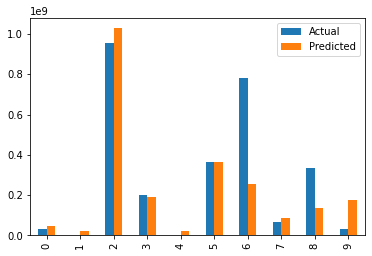

In [ ]:
evaluate.head(10).plot(kind = 'bar')

Dapat dilihat bahwa rata-rata actual lebih tinggi dari predicted.

# D. Multi Regresi Linear

In [ ]:
# Persiapan data
x = dfr[['budget','runtime','vote_average','vote_count']]
y = dfr[['revenue']]

In [ ]:
# Split dataset ke dalam train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
#Training Regresi Linear
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
# Fitting training data
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Cek prediksi skor/akurasi
regressor.score(x_test, y_test)

0.8045040185944231

Pada multi regresi ini, ternyata skornya lebih tinggi dari regresi sebelumnya yaitu 0,8.

In [ ]:
# Prediksi nilai y
y_pred=regressor.predict(x_test)
# Data frame aktual dan prediksi dari nilai y
evaluate2 = pd.DataFrame({'Actual': y_test.values.flatten(),
                         'Predicted': y_pred.flatten()})
evaluate2.head(10)

,Actual,Predicted
0,33395426.0,8.542590e+07
1,0.0,-1.895092e+07
2,956019788.0,9.319339e+08
3,201585328.0,4.253322e+08
4,0.0,-4.048916e+07
5,363164265.0,3.694463e+08
6,783112979.0,1.076314e+09
7,68411275.0,2.751119e+07
8,333000000.0,2.890671e+08
9,29907685.0,6.863837e+07


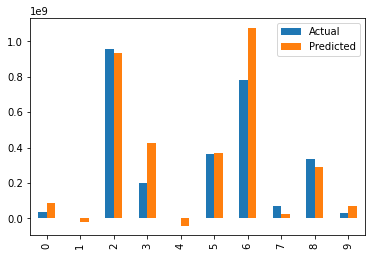

In [ ]:
evaluate2.head(10).plot(kind = 'bar')

Terlihat pada diagram di atas, antara predicted dengan actual cukup berimbang.